In [93]:
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [110]:
#데이터 가져오기
df = pd.read_csv("raw_data/df_grouped_rate.csv", encoding ='utf-8')
cgoongu = pd.read_csv("raw_data/cgoongoo1.csv", encoding ='utf-8')

In [111]:
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district'], axis=1, inplace =True)

In [112]:
df_merged.columns

Index(['year', 'code', 'sales_total', 's_store_no_of_store',
       's_store_no_of_opening', 's_store_no_of_closing', 's_work_female',
       's_float_male', 's_float_female', 'b_facil_total', 'b_apt_avg_price',
       'b_income_avg_monthly_inc', 'sales_weekday', 'sales_female',
       'sales_2030s', 'sales_06_11', 'sales_11_14', 'sales_14_17',
       'sales_17_21', 'sales_21_24', 'cgoongoo'],
      dtype='object')

In [118]:
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

scale_columns = [i for i in df.columns if i not in ['year', 'district', 'code','cgoongoo']]

rb = RobustScaler()
rb.fit(df_merged[scale_columns])
df_robust_scaled = rb.transform(df_merged[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
df_robust_scaled=pd.concat([df_robust_scaled,df_merged[['code','cgoongoo']]], axis=1)
# df_robust_scaled.columns


X_columns = [i for i in df_robust_scaled.columns if i not in ['sales_total']]
X= for_reg[X_columns]
y= for_reg['sales_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6 )

df_train=pd.concat([y_train, X_train], axis=1)
df_train.columns
model= sm.OLS.from_formula("sales_total ~ C(code)+ {}+0".format(" + ".join(df_train[df_train.columns[1:-2]])), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:45:14   Log-Likelihood:                -2227.4
No. Observations:                2236   AIC:                             4579.
Df Residuals:                    2174   BIC:                             4933.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(code)[CS100001]       

### 시군구별로 groupby 해서 OLS

In [122]:
#데이터 가져오기
df = pd.read_csv("raw_data/df_grouped.csv", encoding ='utf-8')
cgoongu = pd.read_csv("raw_data/cgoongoo1.csv", encoding ='utf-8')

In [123]:
df_merged = pd.merge(df, cgoongu, on=['district'])
df_merged.drop(['district'], axis=1, inplace =True)

In [124]:
df_cgoongu_gb = df_merged.groupby(['year','cgoongoo', 'code']).agg({
'sales_total' : 'sum',
's_store_no_of_store' : 'median',
's_store_no_of_opening' : 'sum',
's_store_no_of_closing' : 'sum',
'sales_weekday_amt' : 'sum',
'sales_female_amt' : 'sum',
'sales_2030s_amt' : 'sum',
'sales_06_11_amt' : 'sum',
'sales_11_14_amt' : 'sum',
'sales_14_17_amt' : 'sum',
'sales_17_21_amt' : 'sum',
'sales_21_24_amt' : 'sum',
's_work_female' : 'sum',
's_float_male' : 'sum',
's_float_female' : 'sum',
'b_facil_total' : "median",
'b_apt_avg_price' : 'median',
'b_income_avg_monthly_inc' : 'median',
})

In [134]:
#비율로 바꾸기
df_cgoongu_gb['sales_weekday']= df_cgoongu_gb['sales_weekday_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_female']= df_cgoongu_gb['sales_female_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_2030s']= df_cgoongu_gb['sales_2030s_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_06_11']= df_cgoongu_gb['sales_06_11_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_11_14']= df_cgoongu_gb['sales_11_14_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_14_17']= df_cgoongu_gb['sales_14_17_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_17_21']= df_cgoongu_gb['sales_17_21_amt']/df_cgoongu_gb['sales_total']
df_cgoongu_gb['sales_21_24']= df_cgoongu_gb['sales_21_24_amt']/df_cgoongu_gb['sales_total']


In [136]:
df_cgoongu_gb.drop(columns=['sales_weekday_amt', 'sales_female_amt',
       'sales_2030s_amt', 'sales_06_11_amt', 'sales_11_14_amt',
       'sales_14_17_amt', 'sales_17_21_amt', 'sales_21_24_amt'], inplace=True)

In [141]:
# df 저장
#index에 names=['year', 'cgoongoo', 'code']가 들어있다
df_cgoongu_gb.to_csv('raw_data/df_cgoongu_gb.csv', index=True, encoding='utf-8')

In [142]:
df_cgoongu_gb.head()

,index,year,cgoongoo,code,sales_total,s_store_no_of_store,s_store_no_of_opening,s_store_no_of_closing,s_work_female,s_float_male,...,b_apt_avg_price,b_income_avg_monthly_inc,sales_weekday,sales_female,sales_2030s,sales_06_11,sales_11_14,sales_14_17,sales_17_21,sales_21_24
0,0,2015,11110,CS100001,8.134696e+10,15.0,45,49,22861,5680466,...,133917831.0,3866806.0,0.710255,0.318485,0.322590,0.007781,0.331539,0.158205,0.373575,0.119509
1,1,2015,11110,CS100002,5.430704e+09,2.0,7,2,12618,2380391,...,136793380.5,3661921.5,0.739527,0.263804,0.392210,0.009649,0.393082,0.144902,0.381537,0.048961
2,2,2015,11110,CS100003,3.955969e+09,1.5,4,5,10482,1392226,...,149086281.0,3916667.0,0.746246,0.335890,0.414516,0.000434,0.358499,0.142740,0.334512,0.153893
3,3,2015,11110,CS100004,3.227307e+10,6.0,25,13,19835,2590649,...,158503632.0,4132867.0,0.652303,0.411511,0.499407,0.005722,0.239160,0.211898,0.379132,0.155454
4,4,2015,11110,CS100005,1.848325e+10,4.0,36,24,15127,4425723,...,133917831.0,3866806.0,0.650602,0.472356,0.548636,0.024061,0.307396,0.251923,0.350909,0.054806


In [138]:
# df_cgoongu_gb.reset_index(inplace=True)

In [148]:
df_cgoongu_gb.drop(columns='index', inplace=True)

In [149]:
df_cgoongu_gb.columns

Index(['year', 'cgoongoo', 'code', 'sales_total', 's_store_no_of_store',
       's_store_no_of_opening', 's_store_no_of_closing', 's_work_female',
       's_float_male', 's_float_female', 'b_facil_total', 'b_apt_avg_price',
       'b_income_avg_monthly_inc', 'sales_weekday', 'sales_female',
       'sales_2030s', 'sales_06_11', 'sales_11_14', 'sales_14_17',
       'sales_17_21', 'sales_21_24'],
      dtype='object')

In [151]:
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

scale_columns = [i for i in df_cgoongu_gb.columns if i not in ['year', 'cgoongoo', 'code',]]

rb = RobustScaler()
rb.fit(df_cgoongu_gb[scale_columns])
df_robust_scaled = rb.transform(df_cgoongu_gb[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
df_robust_scaled=pd.concat([df_robust_scaled,df_merged[['code','cgoongoo']]], axis=1)
# df_robust_scaled.columns


X_columns = [i for i in df_robust_scaled.columns if i not in ['sales_total']]
X= for_reg[X_columns]
y= for_reg['sales_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6 )

df_train=pd.concat([y_train, X_train], axis=1)
df_train.columns
model= sm.OLS.from_formula("sales_total ~ C(code)+ {}+0".format(" + ".join(df_train[df_train.columns[1:-2]])), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     250.8
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:58:51   Log-Likelihood:                -2133.7
No. Observations:                2236   AIC:                             4391.
Df Residuals:                    2174   BIC:                             4745.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(code)[CS100001]       

## 결론 
- R2가 높게 나왔다
- log값을 취하는 것이 좋은지 등 분포를 파악하기 위해 부분회귀분석 실시

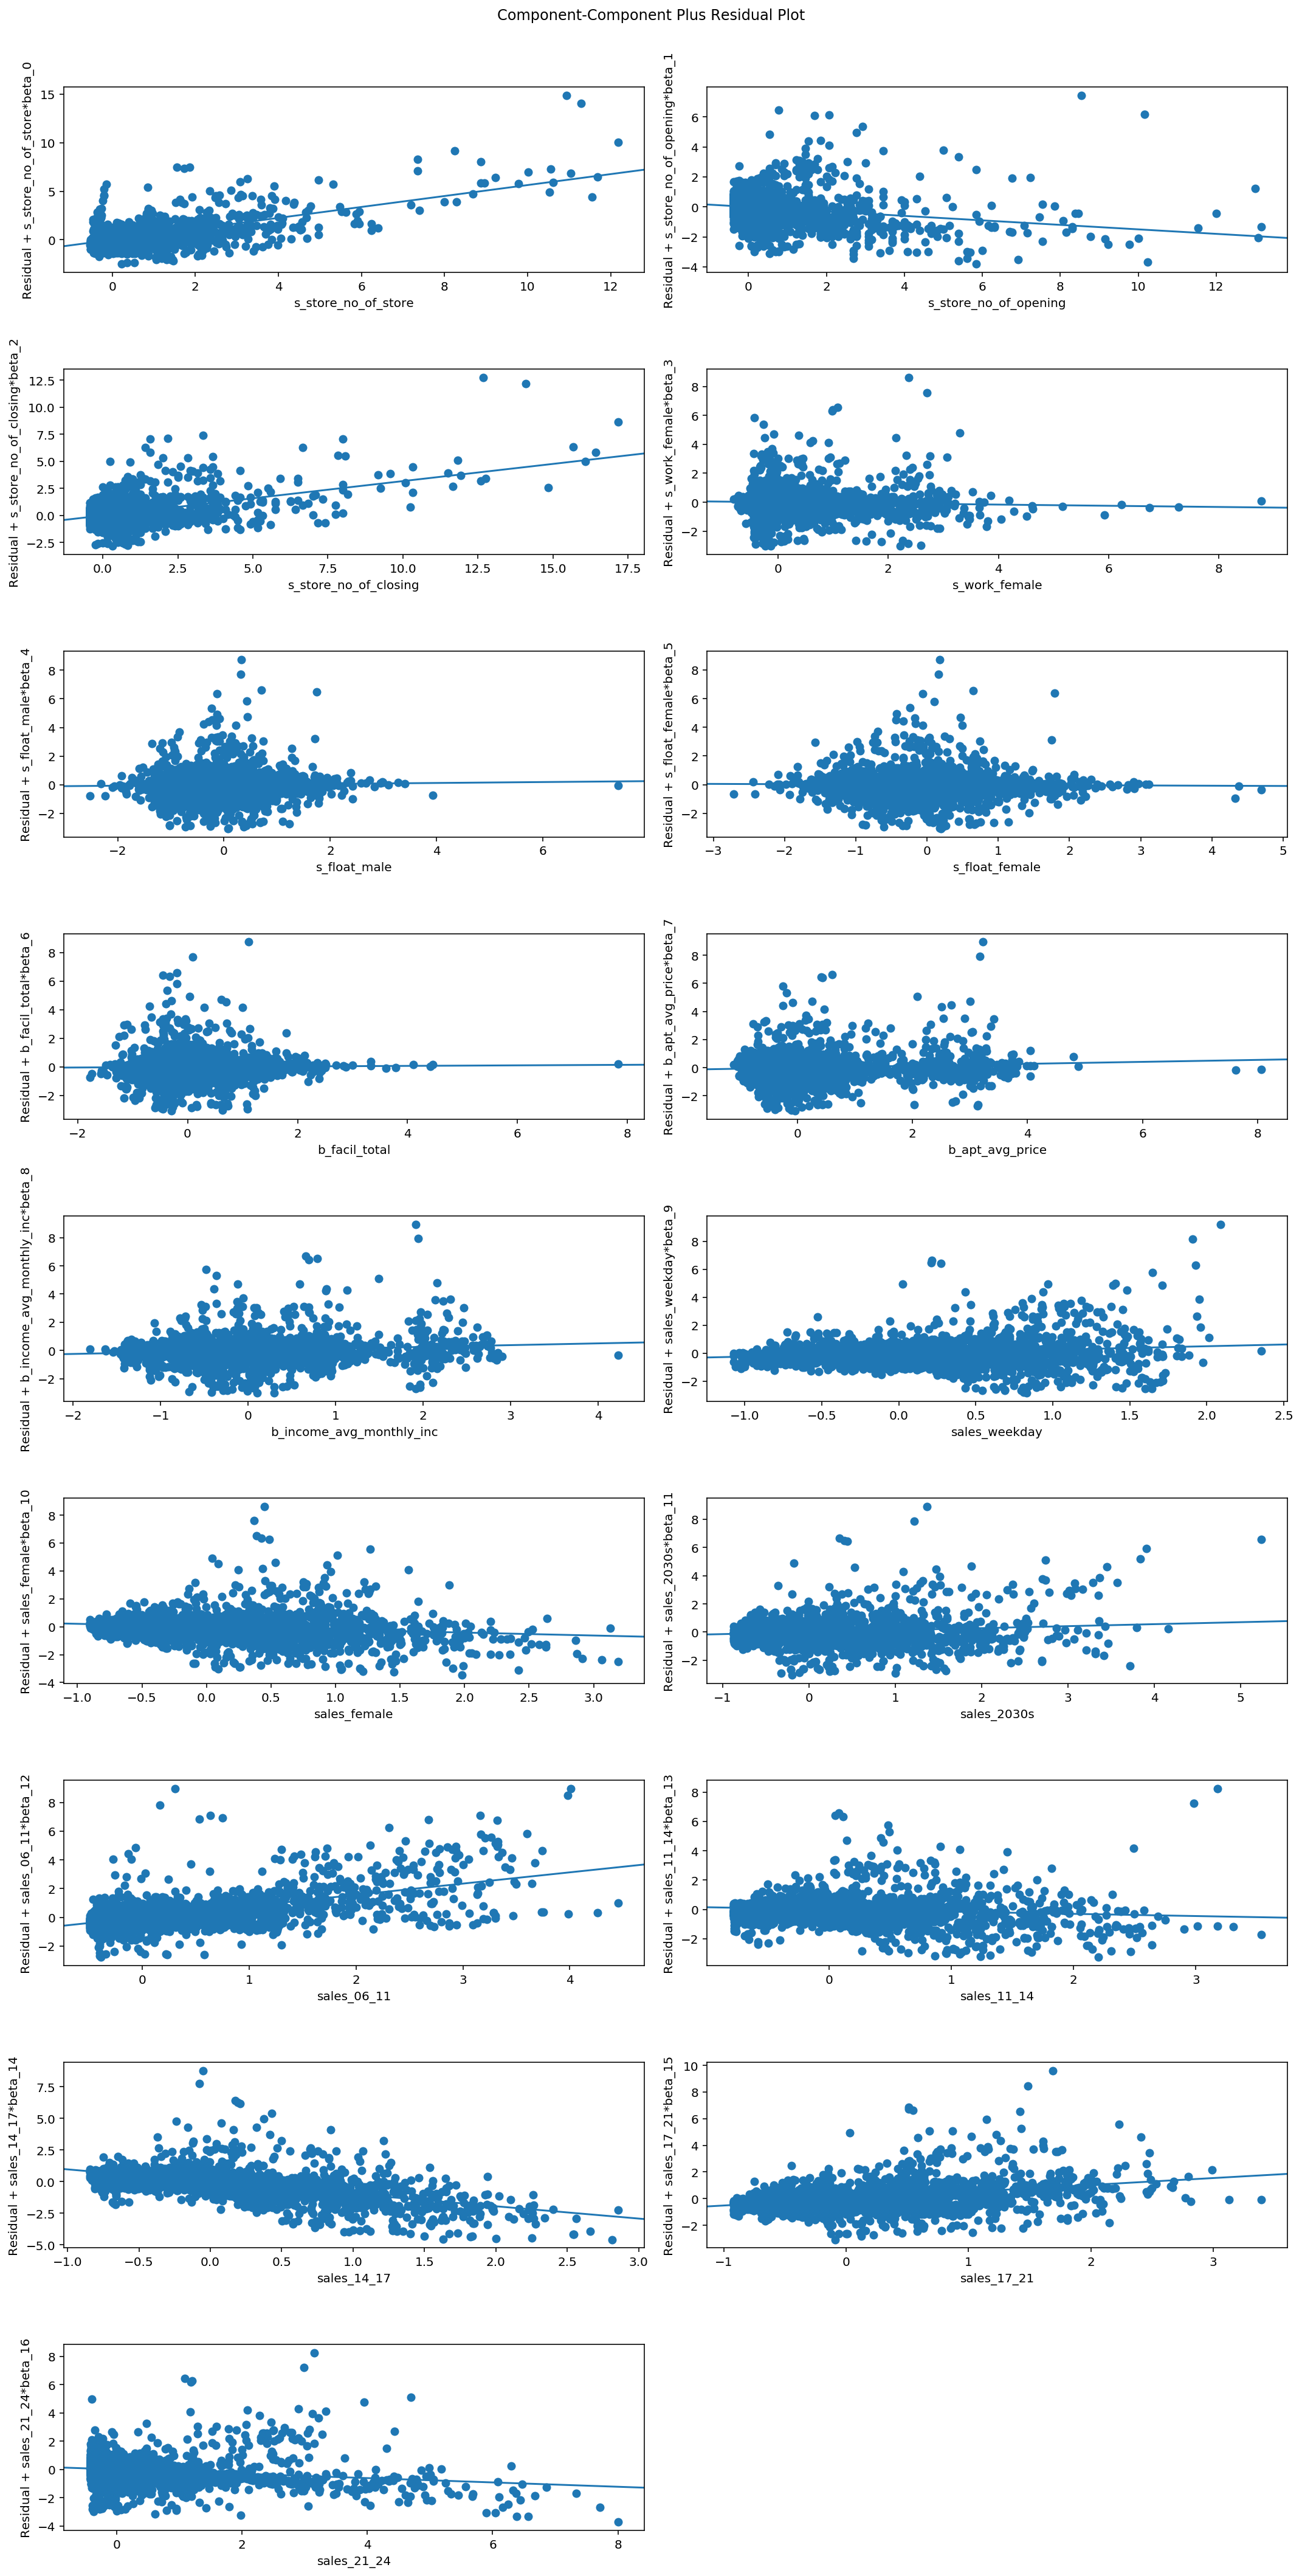

In [154]:
#부분회귀분석 CCPR플롯으로 표현
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
scale_columns = [i for i in df_cgoongu_gb.columns if i not in ['year', 'cgoongoo', 'code',]]

rb = RobustScaler()
rb.fit(df_cgoongu_gb[scale_columns])
df_robust_scaled = rb.transform(df_cgoongu_gb[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
df_robust_scaled=pd.concat([df_robust_scaled,df_merged[['code','cgoongoo']]], axis=1)
# df_robust_scaled.columns


X_columns = [i for i in df_robust_scaled.columns if i not in ['sales_total']]
X= for_reg[X_columns]
y= for_reg['sales_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6 )

df_train=pd.concat([y_train, X_train], axis=1)
df_train.columns
model= sm.OLS.from_formula("sales_total ~ {}+0".format(" + ".join(df_train[df_train.columns[1:-2]])), data=df_train)
result =  model.fit()
fig = plt.figure(figsize=(15,30))
sm.graphics.plot_ccpr_grid(result, fig=fig)
plt.show()

### 모델 검증하기

In [160]:
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

scale_columns = [i for i in df_cgoongu_gb.columns if i not in ['year', 'cgoongoo', 'code',]]

rb = RobustScaler()
rb.fit(df_cgoongu_gb[scale_columns])
df_robust_scaled = rb.transform(df_cgoongu_gb[scale_columns])
df_robust_scaled = pd.DataFrame(df_robust_scaled, columns=scale_columns)
df_robust_scaled=pd.concat([df_robust_scaled,df_merged[['code','cgoongoo']]], axis=1)
# df_robust_scaled.columns


X_columns = [i for i in df_robust_scaled.columns if i not in ['sales_total']]
X= for_reg[X_columns]
y= for_reg['sales_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6 )

df_train=pd.concat([y_train, X_train], axis=1)
df_train.columns
model= sm.OLS.from_formula("sales_total ~ C(code)+ {}+0".format(" + ".join(df_train[df_train.columns[1:-2]])), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_total   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     205.9
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:07:23   Log-Likelihood:                -2281.6
No. Observations:                2236   AIC:                             4687.
Df Residuals:                    2174   BIC:                             5041.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
C(code)[CS100001]       

In [161]:
#오차합 구하기
y_pred = result .predict(X_test)
resid=y_test-y_pred
rss=np.sum(resid**2)
MSE=rss/(result.nobs-2)

#RMSE 구하기
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_test, y_pred)
MSE, rmse

(0.6868651186671806, 0.6762870216476328)

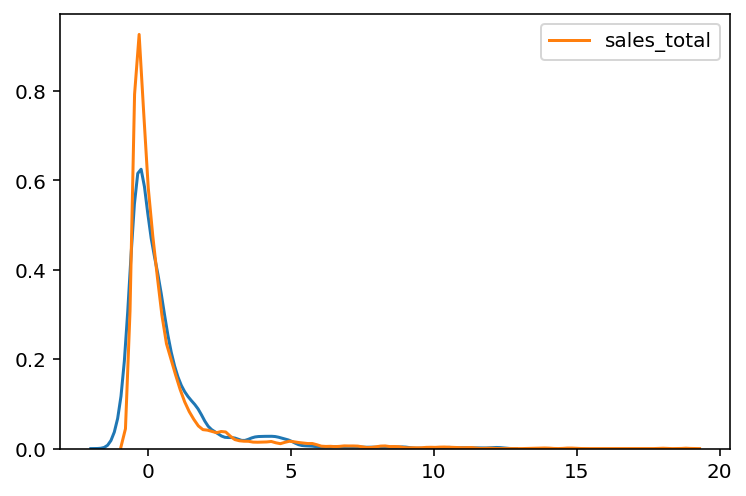

In [162]:
y_pred = result .predict(X_test)
sns.kdeplot(y_pred)
sns.kdeplot(y_test,)
# plt.title("")
plt.show()

In [163]:
from sklearn.model_selection import KFold

scores = np.zeros(5)
cv = KFold(5, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(for_reg)):
    df_train = for_reg.iloc[idx_train]
    df_test = for_reg.iloc[idx_test]
    column_x = [i for i in df_train.columns if i not in ['sales_total']]

    model= sm.OLS.from_formula("sales_total ~ C(year)+C(code)+ "+" + ".join( df_train[column_x[3:]]), data=df_train)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = ((df_test.sales_total - pred) ** 2).sum()
    tss = ((df_test.sales_total - df_test.sales_total.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))

학습 R2 = 0.85813211, 검증 R2 = 0.84063070
학습 R2 = 0.85662178, 검증 R2 = 0.84377610
학습 R2 = 0.84934080, 검증 R2 = 0.86476175
학습 R2 = 0.85364121, 검증 R2 = 0.85752650
학습 R2 = 0.85827708, 검증 R2 = 0.83258452


## 의미 도출